In [90]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

%matplotlib inline

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [91]:
# load the boston housing data
boston = load_boston()

In [92]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [93]:
boston.data.shape

(506, 13)

In [94]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [95]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [96]:
bost = pd.DataFrame(boston.data)
bost.columns = boston.feature_names
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
print(boston.target.shape)

(506,)


In [98]:
# add target price
bost['PRICE'] = boston.target

In [99]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [100]:
#EDA

In [101]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


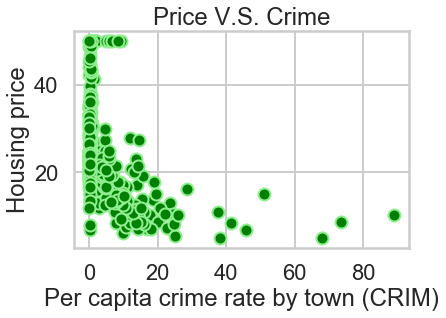

In [102]:
plt.scatter(bost.CRIM, bost.PRICE, c='green',edgecolors='lightgreen')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing price")
plt.title("Price V.S. Crime")
plt.show()


### Part 2 Checkup Exercise Set I
Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

### Describe relationship 
#### Negative, non-linear; same CRIM could correpsond to different housing for CRIM in the range of 0 to 15. There are a few outliers in the CRIM range of 0 to 15

### Scatter plot between RM and PRICE
#### Numbers of room and housing price are positively related; the relationship looks linear; there a few outliers that seem to have high influence and high leverage (3.561, 27.5) (8.780, 21.9) or high influence and low leverage(5.875, 50).

In [103]:
bost[(bost.RM>5)&(bost.RM<6)&(bost.PRICE==50)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


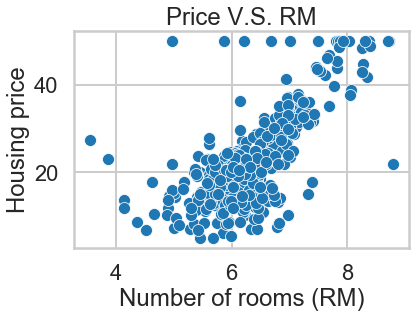

In [104]:
sns.scatterplot(x='RM', y='PRICE', data=bost)
plt.xlabel('Number of rooms (RM)')
plt.ylabel('Housing price')
plt.title('Price V.S. RM')
plt.show()

### your turn: scatter plot between PTRATIO and PRICE
#### Pupil-to-teacher ratio in schools seems to be negatively related to housing price, and relationship seems linear.

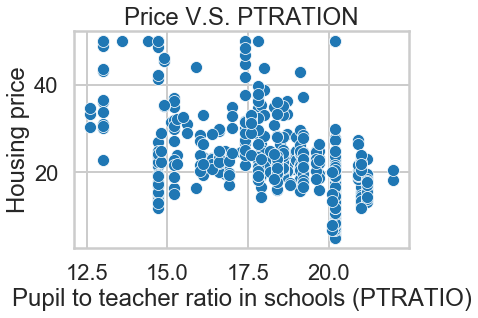

In [105]:
sns.scatterplot(x='PTRATIO', y='PRICE', data=bost)
plt.xlabel('Pupil to teacher ratio in schools (PTRATIO)')
plt.ylabel('Housing price')
plt.title('Price V.S. PTRATION')
plt.show()

### your turn: create some other scatter plots
#### Weighted distances to 5 boston employment centers are positively related to housing price.

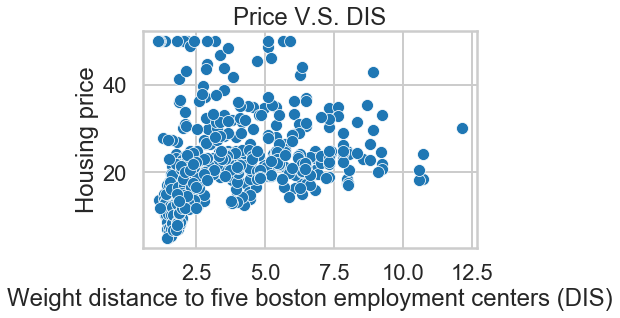

In [106]:
sns.scatterplot(x='DIS', y='PRICE', data=bost)
plt.xlabel('Weight distance to five boston employment centers (DIS)')
plt.ylabel('Housing price')
plt.title('Price V.S. DIS')
plt.show()

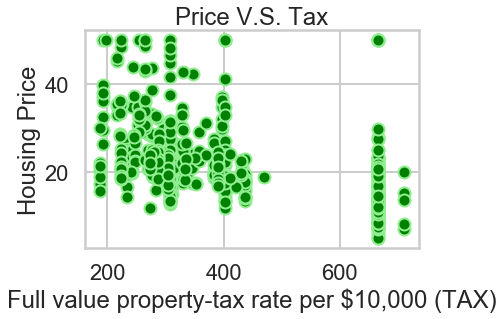

In [107]:
plt.scatter(bost.TAX, bost.PRICE, c='green', edgecolors='lightgreen')
plt.xlabel('Full value property-tax rate per $10,000 (TAX)')
plt.ylabel('Housing Price')
plt.title('Price V.S. Tax')
plt.show()

## More Scatterplots using Seaborn

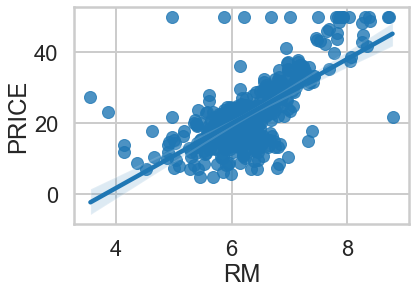

In [108]:
# plot with regression
sns.regplot(x='RM', y='PRICE', data=bost, fit_reg=True)

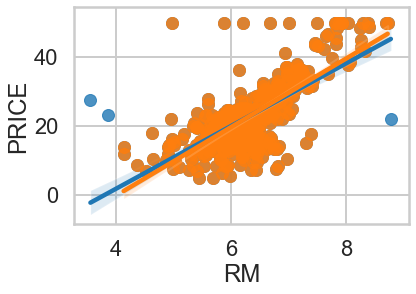

In [109]:
# Remove a few outliers to see change of linear regression line
bost_ed = bost[(bost.RM>4)&(bost.RM!=8.780)]
sns.regplot(x='RM', y='PRICE', data=bost, fit_reg=True)
sns.regplot(x='RM', y='PRICE', data=bost_ed, fit_reg=True)
plt.show()

### Histograms

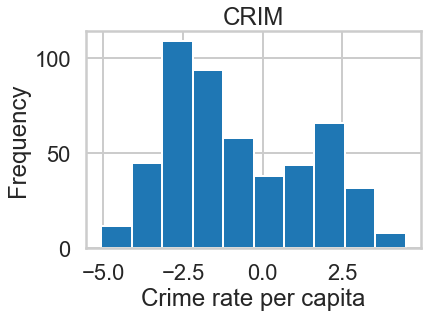

In [110]:
plt.hist(np.log(bost.CRIM))
plt.title('CRIM')
plt.xlabel('Crime rate per capita')
plt.ylabel('Frequency')
plt.show()

### Part 2 Checkup Exercise Set II

Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

Taking logarithm of data is to scale properly so that the bins with small numbers of data points can also be seen clearly. If not taken logarithm, CRIM beyond 20 cannot be seen in histogram.

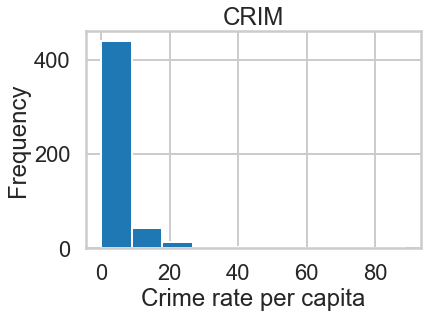

In [111]:
plt.hist(bost.CRIM, bins=10)
plt.title('CRIM')
plt.xlabel('Crime rate per capita')
plt.ylabel('Frequency')
plt.show()

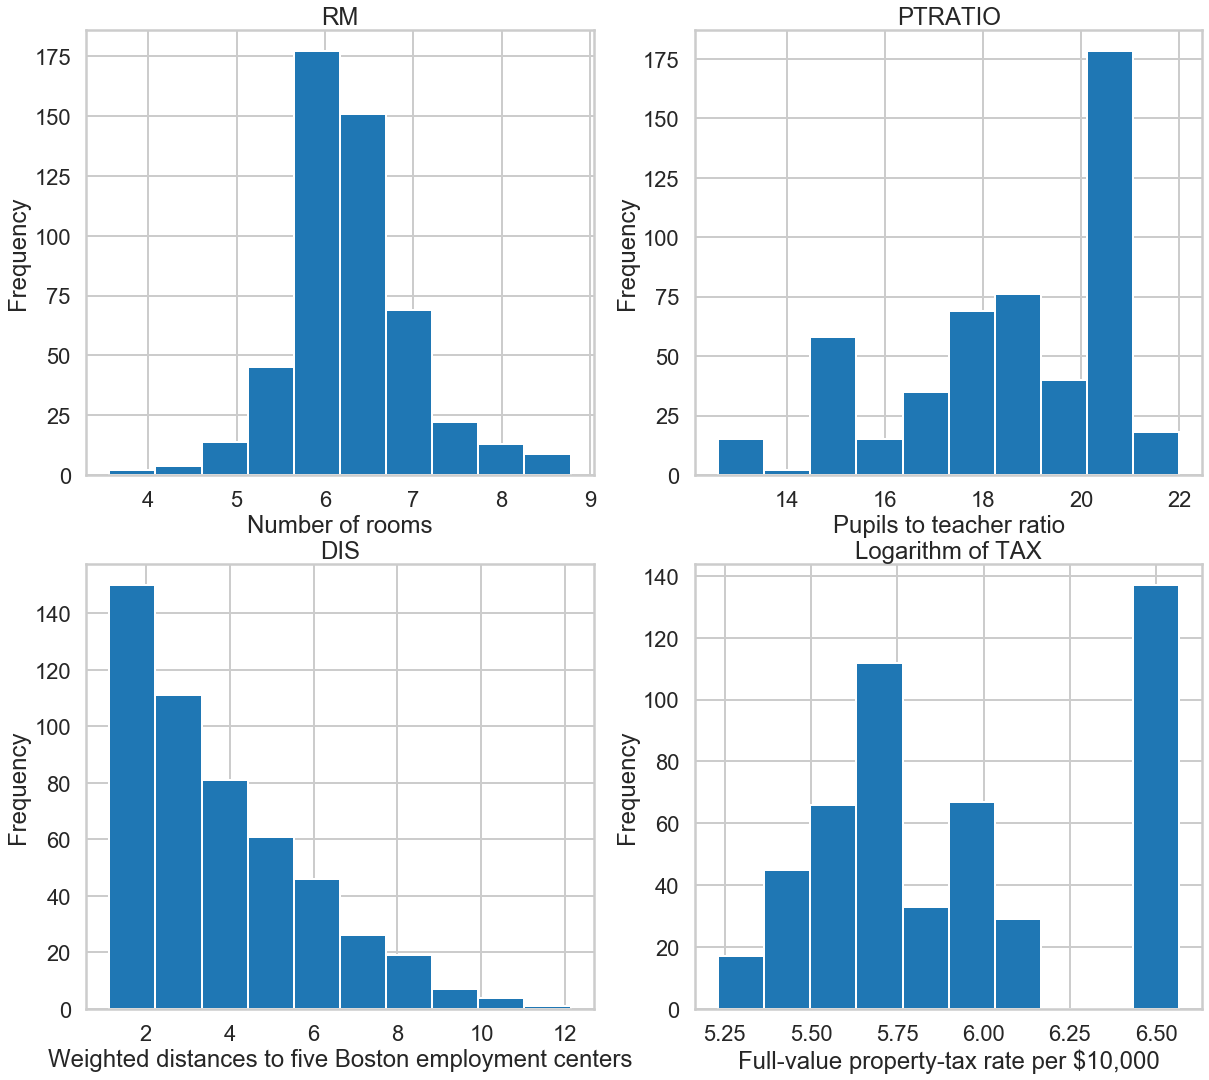

In [112]:
# Subplot

fig, axs = plt.subplots(2,2, figsize=(20,18))

axs[0,0].hist(bost.RM)
axs[0,0].set_title('RM')
axs[0,0].set_xlabel('Number of rooms')
axs[0,0].set_ylabel('Frequency')
axs[0,1].hist(bost.PTRATIO)
axs[0,1].set_title('PTRATIO')
axs[0,1].set_xlabel('Pupils to teacher ratio')
axs[0,1].set_ylabel('Frequency')
axs[1,0].hist(bost.DIS)
axs[1,0].set_title('DIS')
axs[1,0].set_xlabel('Weighted distances to five Boston employment centers')
axs[1,0].set_ylabel('Frequency')
axs[1,1].hist(np.log(bost.TAX))
axs[1,1].set_title('Logarithm of TAX')
axs[1,1].set_xlabel('Full-value property-tax rate per $10,000')
axs[1,1].set_ylabel('Frequency')
plt.show()

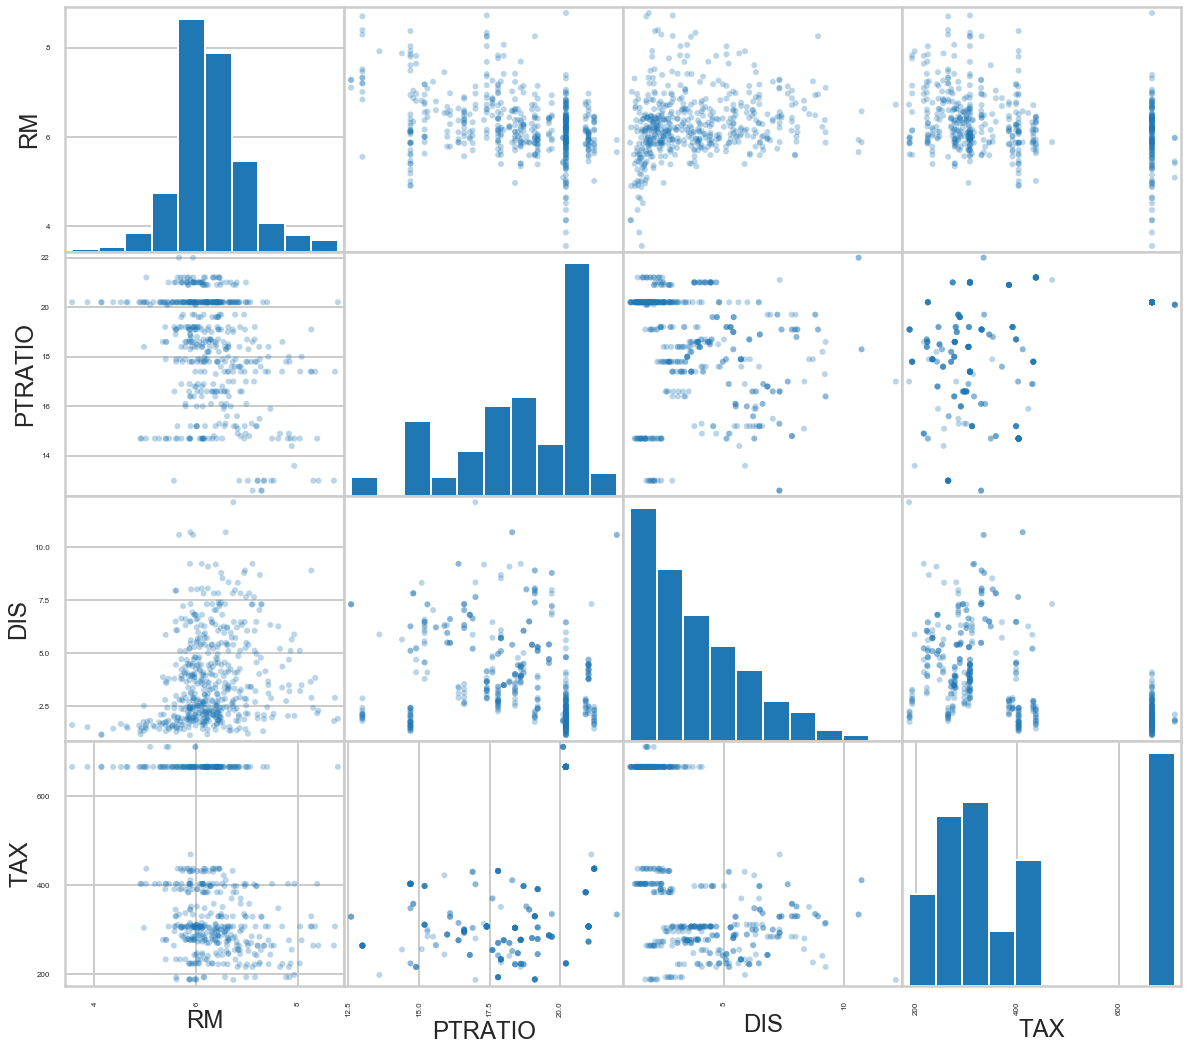

In [113]:
pd.plotting.scatter_matrix(bost[['RM', 'PTRATIO', 'DIS', 'TAX']], alpha=0.3, figsize=(20, 18))
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example

$y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

$X$ = all the other features (or independent variables, predictors or explanatory variables)

we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients. Two linear regression methods will be applied.

### Fitting Linear Regression using statsmodels

Statsmodels is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians
<br> some useful methods include ordinary least-squares (OLS), partial least squares (PLS) and weighted least squares (WLS)

In [114]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [116]:
m = ols('PRICE ~ RM', bost).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.49e-74
Time:                        10:14:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $y$ we get underpredictions, most predictions are below the 45-degree gridlines.

### Part 3 Checkup Exercise Set I
#### Exercise: Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

The predicted price and original price seem to be very positively related, but there are outliers where predicted values are far away from original price. Some house are predicted to have 0 or negative values).

Text(0, 0.5, 'Predicted price')

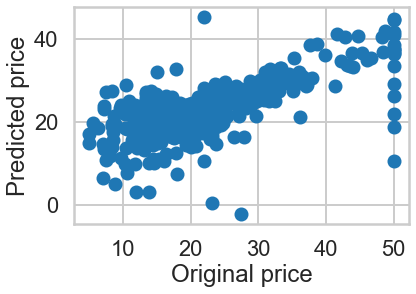

In [120]:
plt.scatter(bost.PRICE, m.fittedvalues)
plt.xlabel('Original price')
plt.ylabel('Predicted price')

### Fitting Linear Regression using sklearn

In [121]:
from sklearn.linear_model import LinearRegression
X = bost.drop('PRICE', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### What can you do with a LinearRegression object?


<tr><th>Main functions</th>	<th>Description</th></tr>
<tr><th>lm.fit()</th>	<th>Fit a linear model</th></tr>
<tr><th>lm.predit()</th>		<th>Predict Y using the linear model with estimated coefficients</th></tr>
<th>lm.score()</th>	<th>Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model</th></tr>

What output can you get?

In [125]:
# Look inside lm object
# lm.<tab>

<th> Output	Description
<th> lm.coef_	Estimated coefficients
<th> lm.intercept_	Estimated intercept

In [126]:
# The lm.fit() function estimates the coefficients the linear regression using least squares.
lm.fit(X, bost.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Part 3 Checkup Exercise Set II
Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).

Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

Exercise: True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.

1.The regression should go through origin because if the house does not have values originally, it should not be predicted with values. Or if a house has values originally, it should not be predicted as no value or negative value.

2.Not enough. Uniform distribution is also i.i.d. i.i.d requires residuals to be independent and have constant variance. A set of data can be normally distributed, but with subsets that follow different normal distributions (e.g., different means or different variances). In addition, you could have two subsets that are dependent.

3.False. The normality assumption for linear regression applies to the errors, not the outcome variable. Errors' distribution is influenced by Y, so Y has to be continuous, unbounded and measured on an interval or ratio scale. Y's distribution is also influenced by X's. Sometimes you can get normal distribution for errors, but weird-looking Y.

In [128]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,bost.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using 1m.intercept_ and lm.coef_., <br> After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$

In [130]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [131]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [133]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict prices

We can calculate the predicted prices ($\hat{Y}_i$) using lm.predict.

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [138]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

### Part 3 Checkup Exercise Set III
Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

1. Most frequent predicted prices of houses is around 20. The distribution approximates normal distribution in the range of -5 to 45. There are 3 outliers, e.g. houses are predicted to have negative values. This is because these houses have small number of rooms (approximately 4) and low original values. The low original values are the result of several combination factors such as RM, CRIM, DIS and LSTAT. So the original values should be true data. These data should be preprocessed with transformation.
2. statsmodels provides easy access to tune formula according to needs and also gives information about detail statistics such as p-value and f-statistics. scikit-learn are easy to write and has faster algorithm.

In [143]:
y_pred = lm.predict(X)

Text(0.5, 0, 'Predict prices')

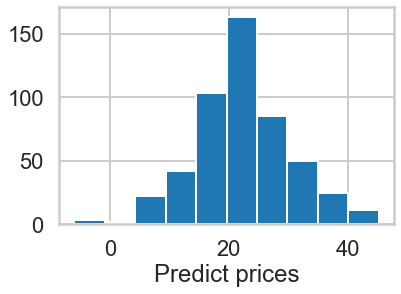

In [144]:
plt.hist(y_pred, bins=10)
plt.xlabel('Predict prices')

In [145]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [147]:
bost[y_pred<0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
412,18.8110,0.0,18.1,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


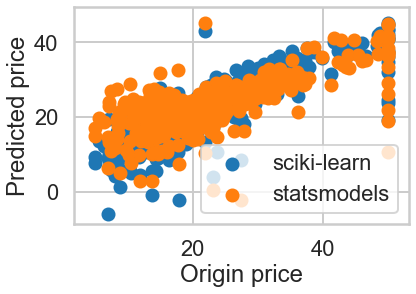

In [148]:
plt.scatter(bost.PRICE, y_pred, label='sciki-learn')
plt.scatter(bost.PRICE, m.fittedvalues, label='statsmodels')
plt.xlabel('Origin price')
plt.ylabel('Predicted price')
plt.legend()